In [2]:
from sympy import Symbol, diff, erf, sqrt, init_printing, ln, exp, pi
from sympy.plotting import plot


from IPython.display import display

init_printing()
%matplotlib inline

## Bachelier Model

$$
C = e^{-rt} \left(Se^{rt}-K\right)
\Phi\left( \frac{Se^{rt}-K}{ \sqrt{\frac{\sigma^2}{2r}(e^{2rt} - 1)}} \right) + 
e^{-rt}\sqrt{\frac{\sigma^2}{2r}(e^{2rt} - 1)}
\phi\left(  \frac{Se^{rt}-K}{ \sqrt{\frac{\sigma^2}{2r}(e^{2rt} - 1)}} \right)
$$

Let's write this in a Python function.

In [3]:
S = Symbol('S', real = True)
K = Symbol('K', real = True)
r = Symbol('r', real = True)
t = Symbol('t', real = True)
sigma = Symbol('sigma', real = True)

The $d$ variable is the argument of the distribution functions.  I also explicity write our the normal cumulative distribution and density functions.

In [4]:
d = (S * exp(r*t) - K) / sqrt(sigma**2/(2*r) * (exp(2*r*t)-1) )

CDF = 0.5 * (1 + erf(d/sqrt(2)) )
PDF = 1/sqrt(2*pi) * exp(-0.5 * d**2)

Write out the expression for the call.

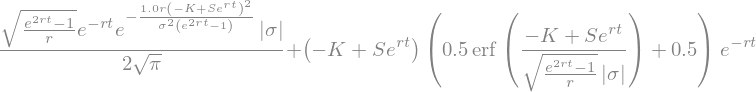

In [5]:
C = exp(-r * t) * (S * exp(r*t) - K) * CDF + exp(-r*t) * sqrt(sigma**2/(2*r) * (exp(2*r*t) - 1)) * PDF
display(C)

We can use our expression and evaulate it numerically.  We pass in a list of tuples.  The first element of the tuple is the variable, and the second it the value.

In [6]:
C.subs( [(S, 100), (K, 105), (r, 0.01), (t, 30/365), (sigma, 0.3 * 100) ] ).evalf()

$\Delta$ is the dderivative of the option price with respect to the underlying's price.  Sympy can do that symbolically with the diff command.

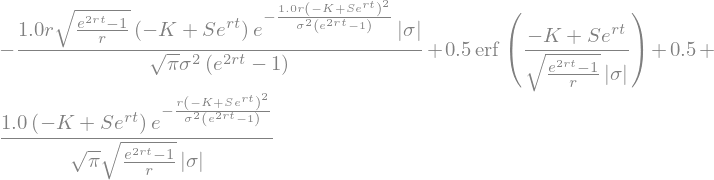

In [7]:
Delta = diff(C, S)
display(Delta)

Of course, we can get a numerical answer for $\Delta$ by substituting in our parameters.

In [8]:
Delta.subs( [(S, 100), (K, 105), (r, 0.01), (t, 30/365), (sigma, 0.3 * 100) ] ).evalf()